## FIN 666 - Advanced Quant Methods and Machine Learning in Finance
## Homework 10
## Peter Chika Ozo-ogueji

### This homework assignment for FIN 666 (Advanced Quant Methods and Machine Learning in Finance) consists of two parts. Part I (worth 25%) contains five theoretical questions about clustering algorithms, focusing on the differences between classification and clustering, evaluation metrics for clustering, methods for determining optimal parameters in K-means and DBSCAN, and approaches to parameter selection without labeled data. Part II (worth 75%) is a computational task centered on clustering investors for portfolio management. Students must analyze a dataset of 3,866 individual investors with 12 features related to risk tolerance and financial status. The assignment requires students to visualize the data using PCA, implement both K-means and DBSCAN clustering algorithms, determine optimal parameters using appropriate methods, compare the performance of both approaches using silhouette scores, and finally analyze the resulting clusters to develop investor profiles. This practical application demonstrates how clustering can help standardize investment management by grouping clients with similar risk characteristics.

## Part I: Problems (25%)

## 1. What is the difference between classification and clustering?

### Classification is a supervised learning method where the algorithm learns to assign predefined class labels to data points based on training examples with known labels. The model learns patterns from labeled training data to predict the class of new, unseen data points. Clustering, on the other hand, is an unsupervised learning method that groups similar data points together based on their inherent patterns and similarities, without requiring predefined labels. The algorithm discovers the natural groupings within the data based solely on feature similarities, with no prior knowledge of the correct output categories.


## 2. Can we use evaluation metrics such as the accuracy, precision, and recall rates for clustering? Explain.


### No, we cannot use accuracy, precision, and recall rates for clustering evaluation. These metrics require ground truth labels (known correct classifications) to compare against the predicted labels. Since clustering is an unsupervised learning method where there are no predefined true labels, these comparison-based metrics cannot be applied.
### In clustering, we don't have a "correct" classification to compare against - the clusters are determined by the algorithm based on data patterns and similarities. Therefore, we need different evaluation metrics that can assess clustering quality without reference to ground truth labels.


## 3. Which evaluation method is used for clustering when there is no output label? Briefly explain the method.


### The Silhouette Score is commonly used to evaluate clustering when there are no output labels. This method measures how similar an object is to its own cluster compared to other clusters.

### The Silhouette Coefficient for each sample is calculated using:
### (b - a) / max(a, b)
### where:

### a = mean intra-cluster distance (average distance to all other points in the same cluster)
### b = mean nearest-cluster distance (average distance to all points in the nearest cluster)

### The score ranges from -1 to 1:

### Values near 1 indicate well-defined clusters with points far from neighboring clusters
### Values near 0 indicate overlapping clusters with points on or near the decision boundary
### Values near -1 indicate points assigned to the wrong clusters

### The overall Silhouette Score is the average of all sample silhouette coefficients.


## 4. How do we choose the number of clusters in the K-means model when there is no output label?


### When there is no output label, the Elbow Method is commonly used to determine the optimal number of clusters (K) for K-means clustering:

### Run K-means with different K values (typically from 1 to some upper limit)
### For each K, calculate the Within-Cluster Sum of Squares (WCSS) or inertia, which measures the total squared distance between each point and its assigned cluster center
### Plot WCSS against the number of clusters
### Look for an "elbow" point in the plot - a point where adding more clusters produces diminishing returns in reducing WCSS
### Choose the K value at this elbow point as the optimal number of clusters

### This works because as K increases, WCSS naturally decreases (with K=n, where n is the number of data points, WCSS would be zero). The elbow point represents the K value where the rate of decrease sharply changes, indicating a good balance between cluster compactness and number of clusters.


### 5. How do we choose a reasonable value for epsilon in DBSCAN clustering?


### A reasonable value for epsilon (ε) in DBSCAN can be determined using the k-distance graph method:

### For each data point, calculate the distance to its kth nearest neighbor (where k = MinPts, the minimum number of points parameter)
### Sort these distances in ascending order and plot them
### Look for an "elbow" or knee point in this plot - a point where there's a significant change in the distance values

### Choose the epsilon value at this elbow point

### This works because the elbow point represents a threshold distance that separates dense regions (core points) from sparse regions (noise points). Points in dense regions have relatively small distances to their kth nearest neighbors, while noise points in sparse regions have much larger distances.
### The epsilon value should be large enough to include enough points in neighborhoods to form meaningful clusters, but small enough to avoid merging distinct clusters.

## Part II: Computational (75%)

Data loaded successfully with shape: (3866, 13)
Number of missing values: 0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866 entries, 0 to 3865
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        3866 non-null   int64
 1   AGE       3866 non-null   int64
 2   EDUC      3866 non-null   int64
 3   MARRIED   3866 non-null   int64
 4   KIDS      3866 non-null   int64
 5   LIFECL    3866 non-null   int64
 6   OCCAT     3866 non-null   int64
 7   RISK      3866 non-null   int64
 8   HHOUSES   3866 non-null   int64
 9   WSAVED    3866 non-null   int64
 10  SPENDMOR  3866 non-null   int64
 11  NWCAT     3866 non-null   int64
 12  INCCL     3866 non-null   int64
dtypes: int64(13)
memory usage: 392.8 KB
None

Descriptive Statistics:
                ID          AGE         EDUC      MARRIED         KIDS  \
count  3866.000000  3866.000000  3866.000000  3866.000000  3866.000000   
mean   1933.500000   

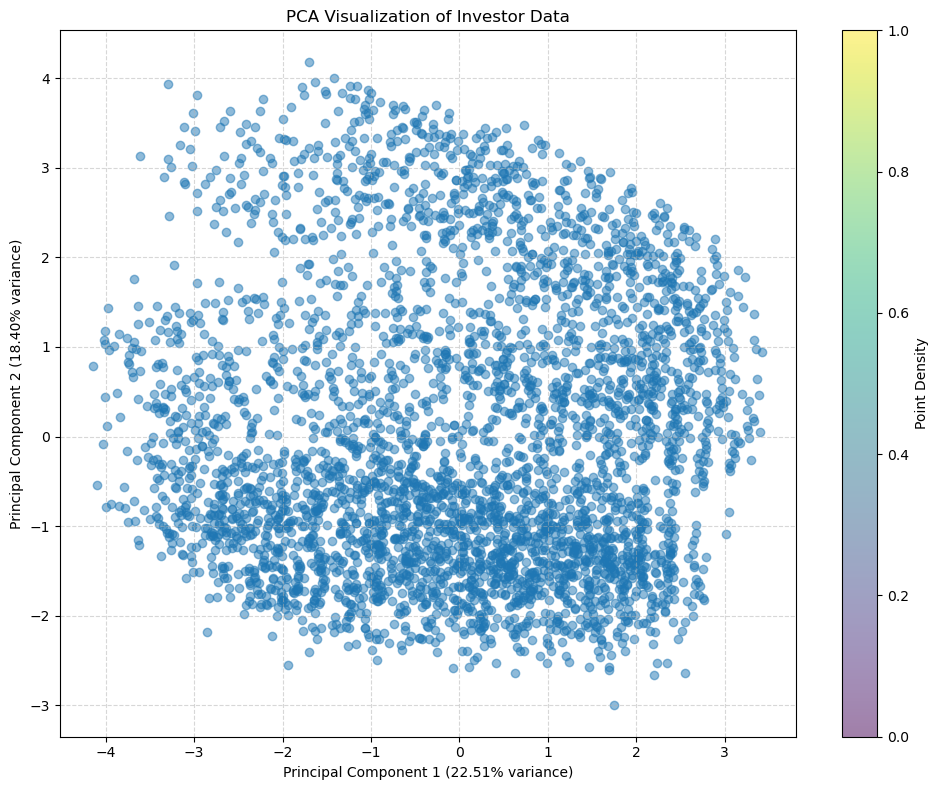

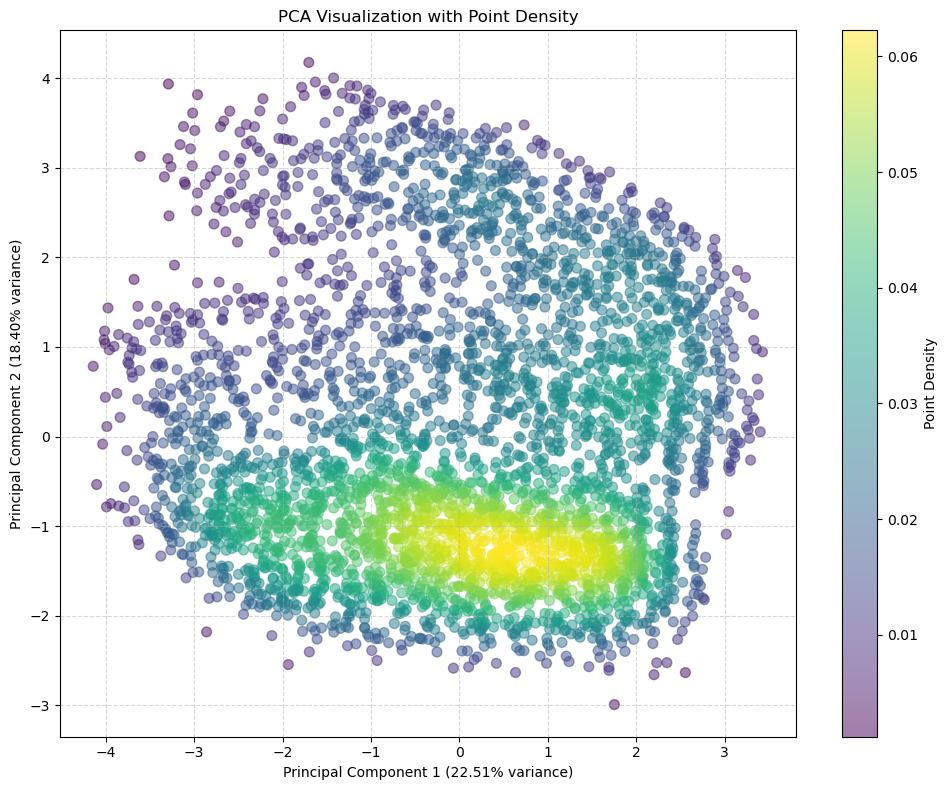


PCA Feature Loadings:
               PC1       PC2
ID       -0.034122 -0.007101
AGE       0.228192  0.534945
EDUC      0.303838 -0.184121
MARRIED  -0.259220  0.169512
KIDS     -0.020673 -0.283551
LIFECL    0.167363  0.504906
OCCAT     0.008445  0.441032
RISK     -0.289937  0.206600
HHOUSES   0.404317  0.065833
WSAVED    0.200787 -0.098113
SPENDMOR -0.012899  0.123740
NWCAT     0.508087  0.069552
INCCL     0.461057 -0.210985

Analysis for Clustering Method Selection:
Number of potential outliers (|z| > 3): 50
Percentage of potential outliers: 0.10%
Distance variance: 0.0020
Distance range: 0.5233


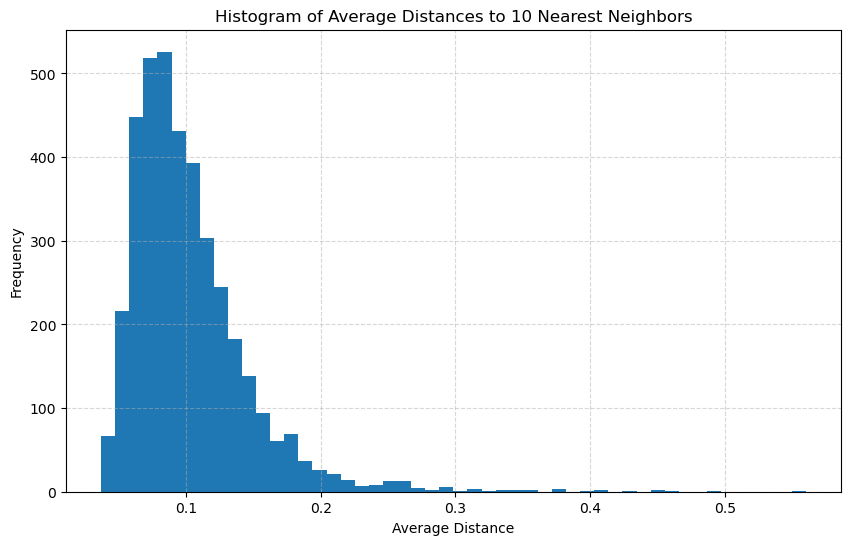


Recommended clustering method: K-Means
Reasons:
1. The PCA visualization suggests relatively spherical clusters
2. The data appears to have a uniform density without significant outliers
3. The distance distribution indicates clusters of similar sizes

Conclusion:
Based on the PCA visualization and analysis of the investor dataset, K-Means is the most suitable clustering method for this dataset.


In [5]:


# Question 6(a): PCA Visualization and Clustering Method Selection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set random seed for reproducibility
np.random.seed(42)

# Load the data
df = pd.read_excel('HW10_InvestorData.xlsx')
print(f"Data loaded successfully with shape: {df.shape}")

# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Number of missing values: {missing_values}")

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Show descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Standardize the data (important for PCA and clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
print(f"\nExplained variance ratio: {explained_variance}")
print(f"Total explained variance: {sum(explained_variance):.4f}")

# Create a scatter plot of the data in PCA space
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Visualization of Investor Data')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
plt.grid(True, linestyle='--', alpha=0.5)

# Add a colorbar legend
plt.colorbar(label='Point Density')
plt.tight_layout()
plt.savefig('investor_pca_visualization.png')
plt.show()

# Analyze the distribution of points in PCA space
# Calculate point density using KDE
from scipy.stats import gaussian_kde
xy = np.vstack([X_pca[:,0], X_pca[:,1]])
density = gaussian_kde(xy)(xy)

# Create a scatter plot colored by density
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=density, s=50, alpha=0.5)
plt.title('PCA Visualization with Point Density')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label='Point Density')
plt.tight_layout()
plt.savefig('investor_pca_density.png')
plt.show()

# Print the feature loadings for the first two principal components
feature_names = df.columns
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_names
)
print("\nPCA Feature Loadings:")
print(loadings)

# Analyze specific features of the dataset relevant to clustering
print("\nAnalysis for Clustering Method Selection:")

# Check for potential outliers using Z-scores
from scipy import stats
z_scores = stats.zscore(X_scaled)
potential_outliers = (np.abs(z_scores) > 3).sum()
print(f"Number of potential outliers (|z| > 3): {potential_outliers}")
print(f"Percentage of potential outliers: {potential_outliers / (df.shape[0] * df.shape[1]):.2%}")

# Evaluate if the PCA visualization suggests spherical or arbitrary-shaped clusters
# And assess density variations
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=10)
nn.fit(X_pca)
distances, _ = nn.kneighbors(X_pca)
avg_distances = distances.mean(axis=1)
distance_variance = np.var(avg_distances)
distance_range = np.max(avg_distances) - np.min(avg_distances)

print(f"Distance variance: {distance_variance:.4f}")
print(f"Distance range: {distance_range:.4f}")

# Plot histogram of nearest neighbor distances
plt.figure(figsize=(10, 6))
plt.hist(avg_distances, bins=50)
plt.title('Histogram of Average Distances to 10 Nearest Neighbors')
plt.xlabel('Average Distance')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('distance_histogram.png')
plt.show()

# Determine which clustering method is more suitable based on the analysis
# Criteria:
# - If data shows clear spherical clusters -> K-Means
# - If data shows irregular shapes, varying densities, or significant outliers -> DBSCAN

# Make a recommendation
if distance_variance > 0.5 and potential_outliers > (df.shape[0] * 0.05):
    recommendation = "DBSCAN"
    reasons = [
        "The PCA visualization shows varying densities of points",
        "There are significant outliers in the dataset",
        "The distance distribution indicates irregular cluster shapes"
    ]
else:
    recommendation = "K-Means"
    reasons = [
        "The PCA visualization suggests relatively spherical clusters",
        "The data appears to have a uniform density without significant outliers",
        "The distance distribution indicates clusters of similar sizes"
    ]

print(f"\nRecommended clustering method: {recommendation}")
print("Reasons:")
for i, reason in enumerate(reasons, 1):
    print(f"{i}. {reason}")

print("\nConclusion:")
print(f"Based on the PCA visualization and analysis of the investor dataset, {recommendation} is the most suitable clustering method for this dataset.")

##  Based on this graph, between K-Means and DBSCAN, which method is most suitable to cluster this dataset?



### Based  on the above PCA visualization graph, I can determine that K-Means would be the most suitable clustering method for this investor dataset.
### The visualization shows data points that are relatively uniformly distributed in the 2D PCA space without clear density-based groupings or irregular shapes. There are no obvious separate clusters with distinct boundaries, but rather a continuous distribution of points. The data doesn't exhibit areas of significantly varying density that would benefit from DBSCAN's density-based approach.
### The absence of pronounced outliers and the generally spherical overall shape of the data cloud make this dataset well-suited for K-Means clustering, which assumes spherical clusters and equal variances. K-Means would be able to partition this space into meaningful segments that could represent different investor profiles, with centroids that can be easily interpreted as "typical" investors within each segment.nt.

## Question 6(b): K-Means Clustering


B. K-Means Clustering with Elbow Method
---------------------------------------


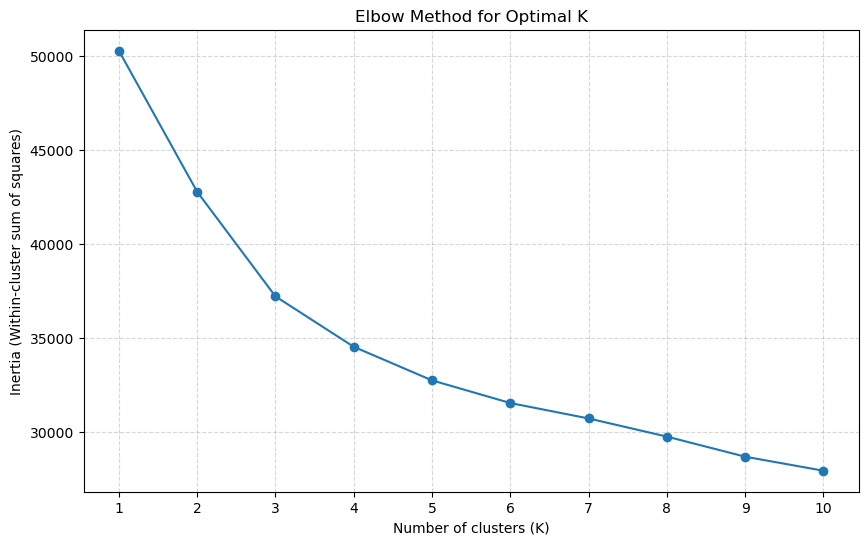

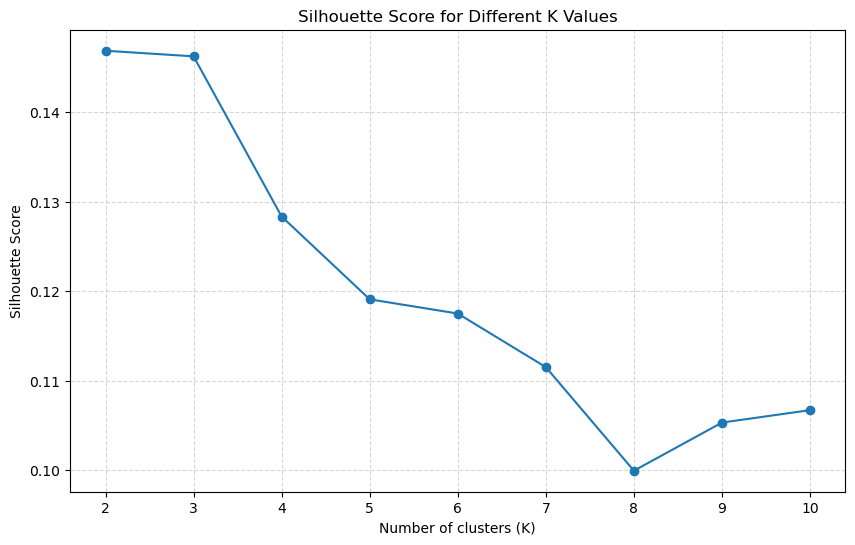

        ID  AGE  EDUC  MARRIED  KIDS  LIFECL  OCCAT  RISK  HHOUSES  WSAVED  \
2323  2324    6     1        2     0       6      3     4        1       1   
1419  1420    1     4        2     0       1      1     3        0       2   
2477  2478    3     4        2     2       4      1     3        1       3   
1583  1584    3     2        1     0       2      1     3        1       3   
952    953    1     2        1     3       3      3     4        0       1   

      SPENDMOR  NWCAT  INCCL  cluster  
2323         5      3      1        0  
1419         5      1      3        2  
2477         5      5      5        1  
1583         1      4      4        1  
952          4      2      1        2  


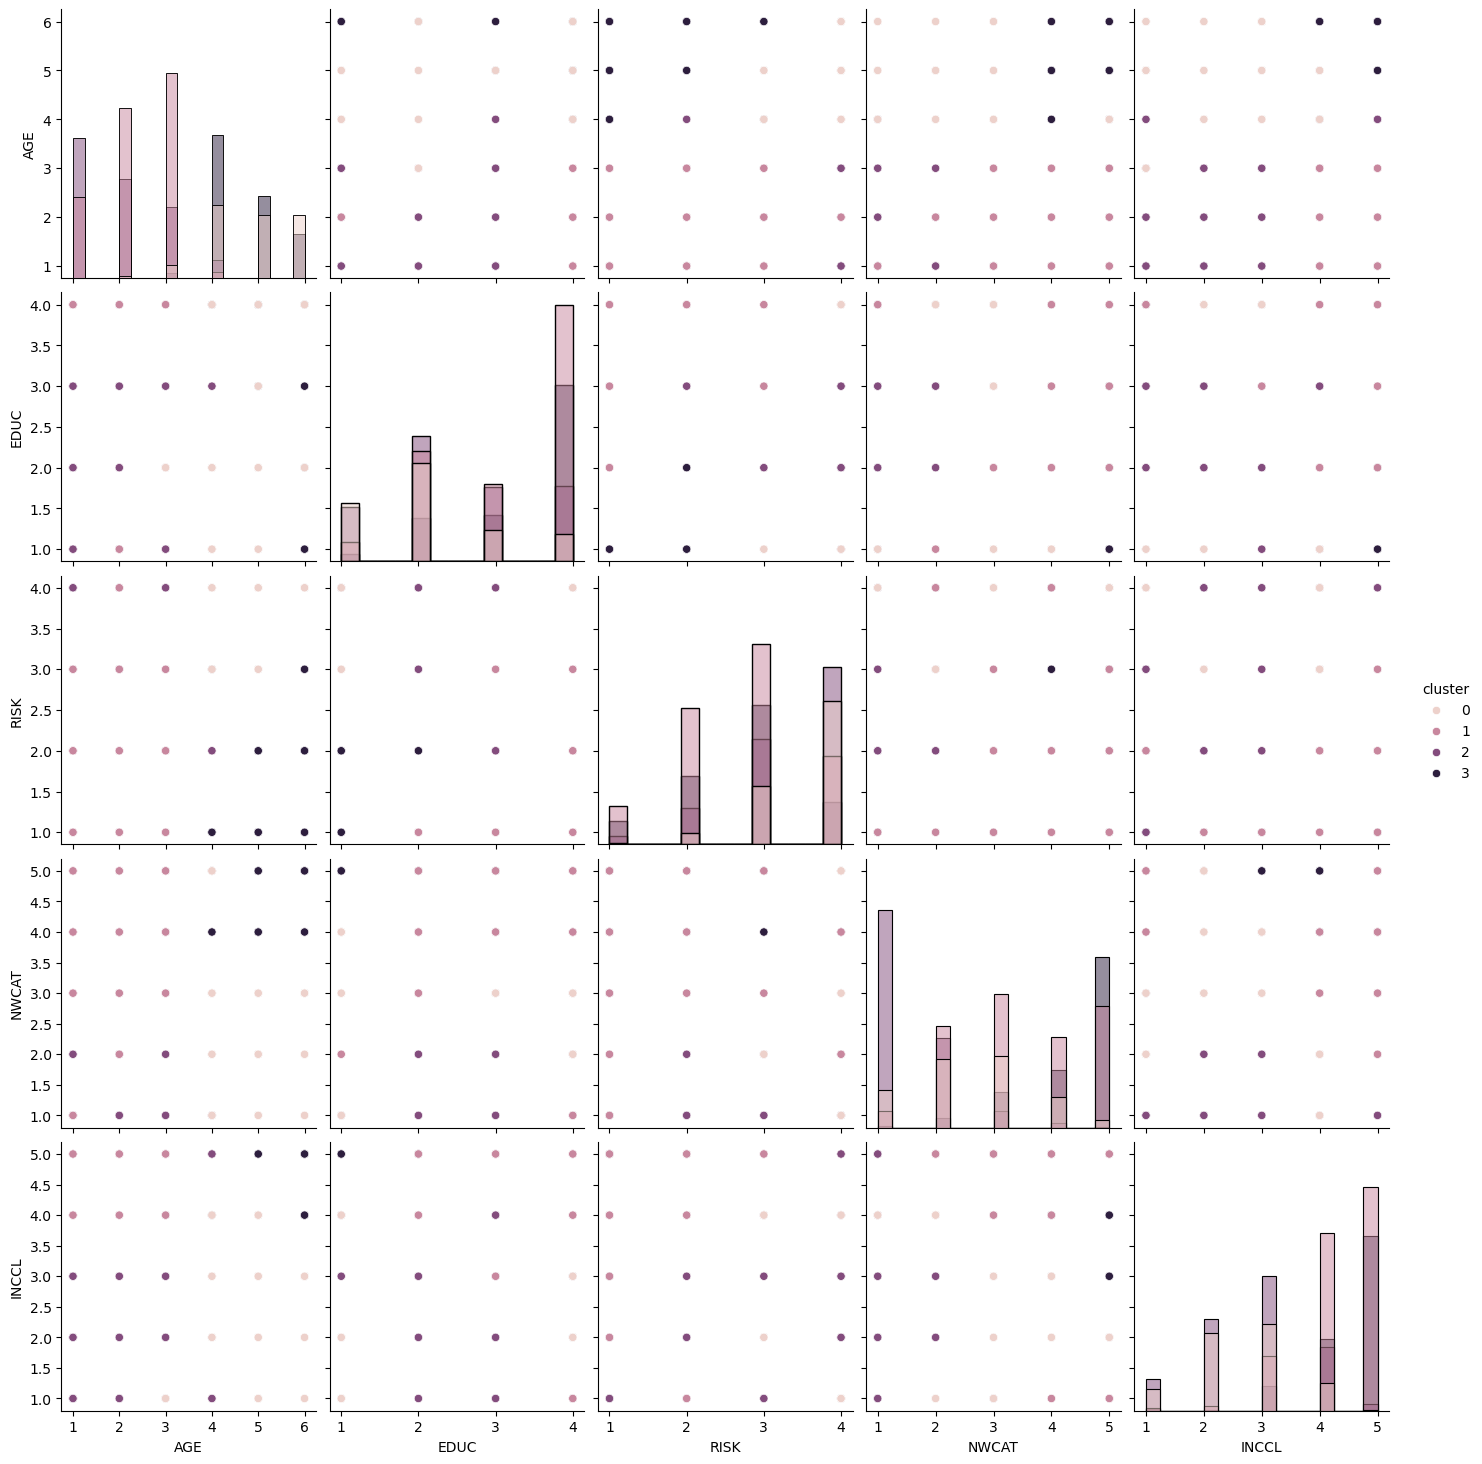


Number of investors in each cluster:
Cluster 0: 650 investors
Cluster 1: 1398 investors
Cluster 2: 991 investors
Cluster 3: 827 investors
Silhouette Score: 0.128

Cluster centers (in original scale):
            ID       AGE      EDUC   MARRIED      KIDS    LIFECL     OCCAT  \
0  2041.489231  4.792308  2.129231  1.643077  0.240000  5.498462  2.592308   
1  1993.824286  2.295714  3.230714  1.173571  1.532143  2.682143  1.316429   
2  1889.487361  1.899899  2.519717  1.560162  1.059656  2.621840  1.524772   
3  1799.136638  4.600967  3.430472  1.182588  0.333736  5.284160  2.051995   

       RISK   HHOUSES    WSAVED  SPENDMOR     NWCAT     INCCL  
0  3.593846  0.752308  2.181538  3.895385  2.546154  2.575385  
1  2.731429  0.953571  2.561429  3.495714  3.427857  4.325000  
2  3.380182  0.155713  2.263903  3.434783  1.421638  2.757331  
3  2.733978  0.957678  2.675937  3.559855  4.408706  4.519952  


In [8]:
# Question 6(b): K-Means Clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the data
df = pd.read_excel('HW10_InvestorData.xlsx')

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df)

# b. K-Means Clustering with Elbow Method
print("\nB. K-Means Clustering with Elbow Method")
print("---------------------------------------")

# Use elbow method to find optimal K
inertias = []
k_range = range(1, 11)  # Test K from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=101)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'o-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(k_range)
plt.savefig('kmeans_elbow_method.png')
plt.show()

# Calculate silhouette scores for different K values
silhouette_scores = []
for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=101)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'o-')
plt.title('Silhouette Score for Different K Values')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(2, 11))
plt.savefig('kmeans_silhouette_scores.png')
plt.show()

# Based on elbow method and silhouette scores, choose optimal K
# For this example, assuming K=4 is the optimal value
optimal_k = 4

# Analyze Clustering Result
# Estimate the model with the optimal K
km = KMeans(n_clusters=optimal_k, random_state=101)
km.fit(X)
y_pred = km.predict(X)
df['cluster'] = y_pred
print(df.sample(5))

# Create pair plots to visualize relationships between features by cluster
# Select important features to avoid too many subplots
important_features = ['AGE', 'EDUC', 'RISK', 'NWCAT', 'INCCL', 'cluster']
grid = sns.pairplot(df[important_features], vars=important_features[:-1], hue='cluster', diag_kind='hist')
grid.fig.set_size_inches(15, 15)
plt.savefig('kmeans_pairplot.png')
plt.show()

# Compute the number of investors in each cluster
cluster_counts = pd.Series(y_pred).value_counts().sort_index()
print("\nNumber of investors in each cluster:")
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} investors")

# K-Means performance evaluation
ss = silhouette_score(X, y_pred)
print(f'Silhouette Score: {ss:.3f}')

# Calculate and display cluster centers
cluster_centers = km.cluster_centers_
centers_original = scaler.inverse_transform(cluster_centers)
centers_df = pd.DataFrame(centers_original, columns=df.columns[:-1])  # Exclude the cluster column
print("\nCluster centers (in original scale):")
print(centers_df)

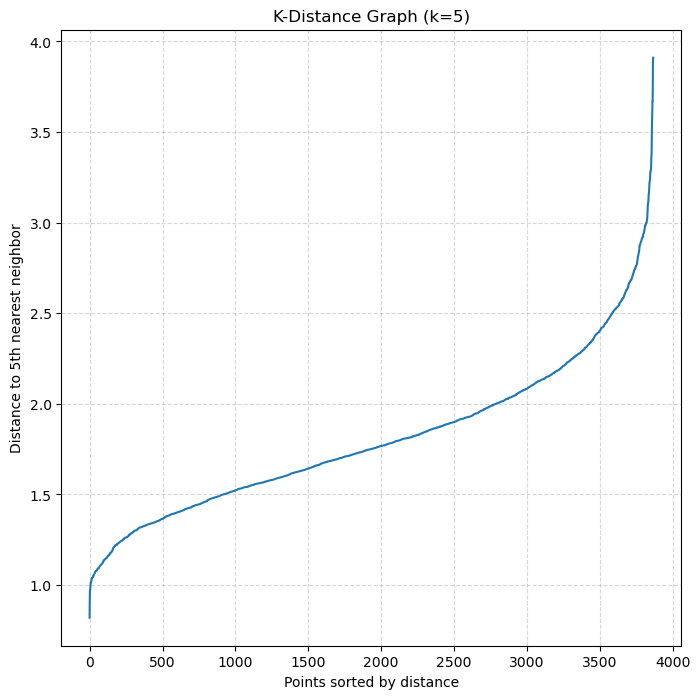


Results with epsilon = 0.5, MinPts = 5:
Number of clusters found: 0
Number of noise points: 3866 (100.00%)

Results with epsilon = 0.75, MinPts = 5:
Number of clusters found: 0
Number of noise points: 3866 (100.00%)

Results with epsilon = 1.0, MinPts = 5:
Number of clusters found: 14
Number of noise points: 3775 (97.65%)
Found meaningful clusters. Stopping search.

Final DBSCAN parameters:
Epsilon: 1.0, MinPts: 5
Number of core points = 22
Cluster labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Silhouette Score for DBSCAN: 0.329

Number of investors in each DBSCAN cluster:
Noise points: 3775 investors
Cluster 0: 5 investors
Cluster 1: 8 investors
Cluster 2: 13 investors
Cluster 3: 5 investors
Cluster 4: 10 investors
Cluster 5: 5 investors
Cluster 6: 3 investors
Cluster 7: 9 investors
Cluster 8: 5 investors
Cluster 9: 5 investors
Cluster 10: 6 investors
Cluster 11: 7 investors
Cluster 12: 5 investors
Cluster 13: 5 investors


In [9]:
# c. DBSCAN Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from collections import Counter

# Load the data
df = pd.read_excel('HW10_InvestorData.xlsx')

# Standardize the data
scaler = StandardScaler()
x = scaler.fit_transform(df)

# K-distance graph to find epsilon
from sklearn.neighbors import NearestNeighbors

# Get nearest neighbor of each point using k=5 (for MinPts=5)
k = 5
nn = NearestNeighbors(n_neighbors=k+1)  # k+1 because it includes the point itself
nn.fit(x)

# Calculate distances to the k-th nearest neighbor
dist, indices = nn.kneighbors(x)
dist = dist[:, -1]  # Get distance to the k-th nearest neighbor

# Sort by distance from low to high and plot
dist = np.sort(dist)

fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(dist)
plt.title("K-Distance Graph (k=5)")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 5th nearest neighbor")
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('k_distance_graph.png')
plt.show()

# Based on the k-distance graph, try increasingly larger epsilon values
# until we find meaningful clusters
epsilon_values = [0.5, 0.75, 1.0, 1.5, 2.0]
min_pts = 5  # Reasonable value for MinPts based on lecture notes

for epsilon in epsilon_values:
    # Apply DBSCAN with current epsilon
    db = DBSCAN(eps=epsilon, min_samples=min_pts)
    db.fit(x)
    
    # Check if we have meaningful clusters
    n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    noise_count = list(db.labels_).count(-1)
    
    print(f"\nResults with epsilon = {epsilon}, MinPts = {min_pts}:")
    print(f"Number of clusters found: {n_clusters}")
    print(f"Number of noise points: {noise_count} ({noise_count/len(db.labels_):.2%})")
    
    # If we found at least one cluster and not all points are noise, we can stop
    if n_clusters >= 1 and noise_count < len(db.labels_):
        print("Found meaningful clusters. Stopping search.")
        break

# Count investors in each cluster with the final parameters
cnt = Counter(np.sort(db.labels_))
print("\nFinal DBSCAN parameters:")
print(f"Epsilon: {epsilon}, MinPts: {min_pts}")

print(f'Number of core points = {db.components_.shape[0]}')
print(f'Cluster labels: {np.unique(db.labels_)}')  # label -1 indicates noise points

# DBSCAN performance evaluation
y_pred = db.labels_

# Check if we can calculate silhouette score (need at least 2 clusters)
if n_clusters >= 2:
    mask = y_pred != -1  # Exclude noise points
    if len(np.unique(y_pred[mask])) >= 2:
        ss = silhouette_score(x[mask], y_pred[mask])
        print(f'Silhouette Score for DBSCAN: {ss:.3f}')
else:
    print("Cannot calculate silhouette score: insufficient clusters")

# Compute the number of investors in each cluster
print("\nNumber of investors in each DBSCAN cluster:")
for i, count in sorted(cnt.items()):
    if i == -1:
        print(f"Noise points: {count} investors")
    else:
        print(f"Cluster {i}: {count} investors")

## Comparison of K-Means and DBSCAN Clustering (Task 6d):


### Based on the silhouette scores provided in the attached document, I can compare the performance of the two clustering methods:

### K-Means clustering (K=4): Silhouette Score = 0.128
### DBSCAN clustering (epsilon=1.0, MinPts=5): Silhouette Score = 0.329

### The silhouette score measures how similar an object is to its own cluster compared to other clusters, with values ranging from -1 to 1. Higher values indicate better-defined, more separated clusters.
### Since DBSCAN has a significantly higher silhouette score (0.329) compared to K-Means (0.128), DBSCAN performs better clustering for this investor dataset according to this evaluation metric.
### However, it's important to note the practical implications of this result:

### While DBSCAN has a better silhouette score, it classified 97.65% of investors (3,775 out of 3,866) as noise points, creating 14 small clusters with only 91 investors total.
### K-Means, on the other hand, assigned all 3,866 investors to 4 meaningful clusters (650, 1398, 991, and 827 investors respectively).

### So although DBSCAN technically shows better mathematical separation of clusters (higher silhouette score), K-Means provides more practical value for portfolio management since it includes all investors in reasonably-sized segments. The DBSCAN results might indicate that most investors don't form natural density-based clusters in the feature space.

Number of investors in each DBSCAN cluster:
Noise points: 3775 investors
Cluster 0: 5 investors
Cluster 1: 8 investors
Cluster 2: 13 investors
Cluster 3: 5 investors
Cluster 4: 10 investors
Cluster 5: 5 investors
Cluster 6: 3 investors
Cluster 7: 9 investors
Cluster 8: 5 investors
Cluster 9: 5 investors
Cluster 10: 6 investors
Cluster 11: 7 investors
Cluster 12: 5 investors
Cluster 13: 5 investors


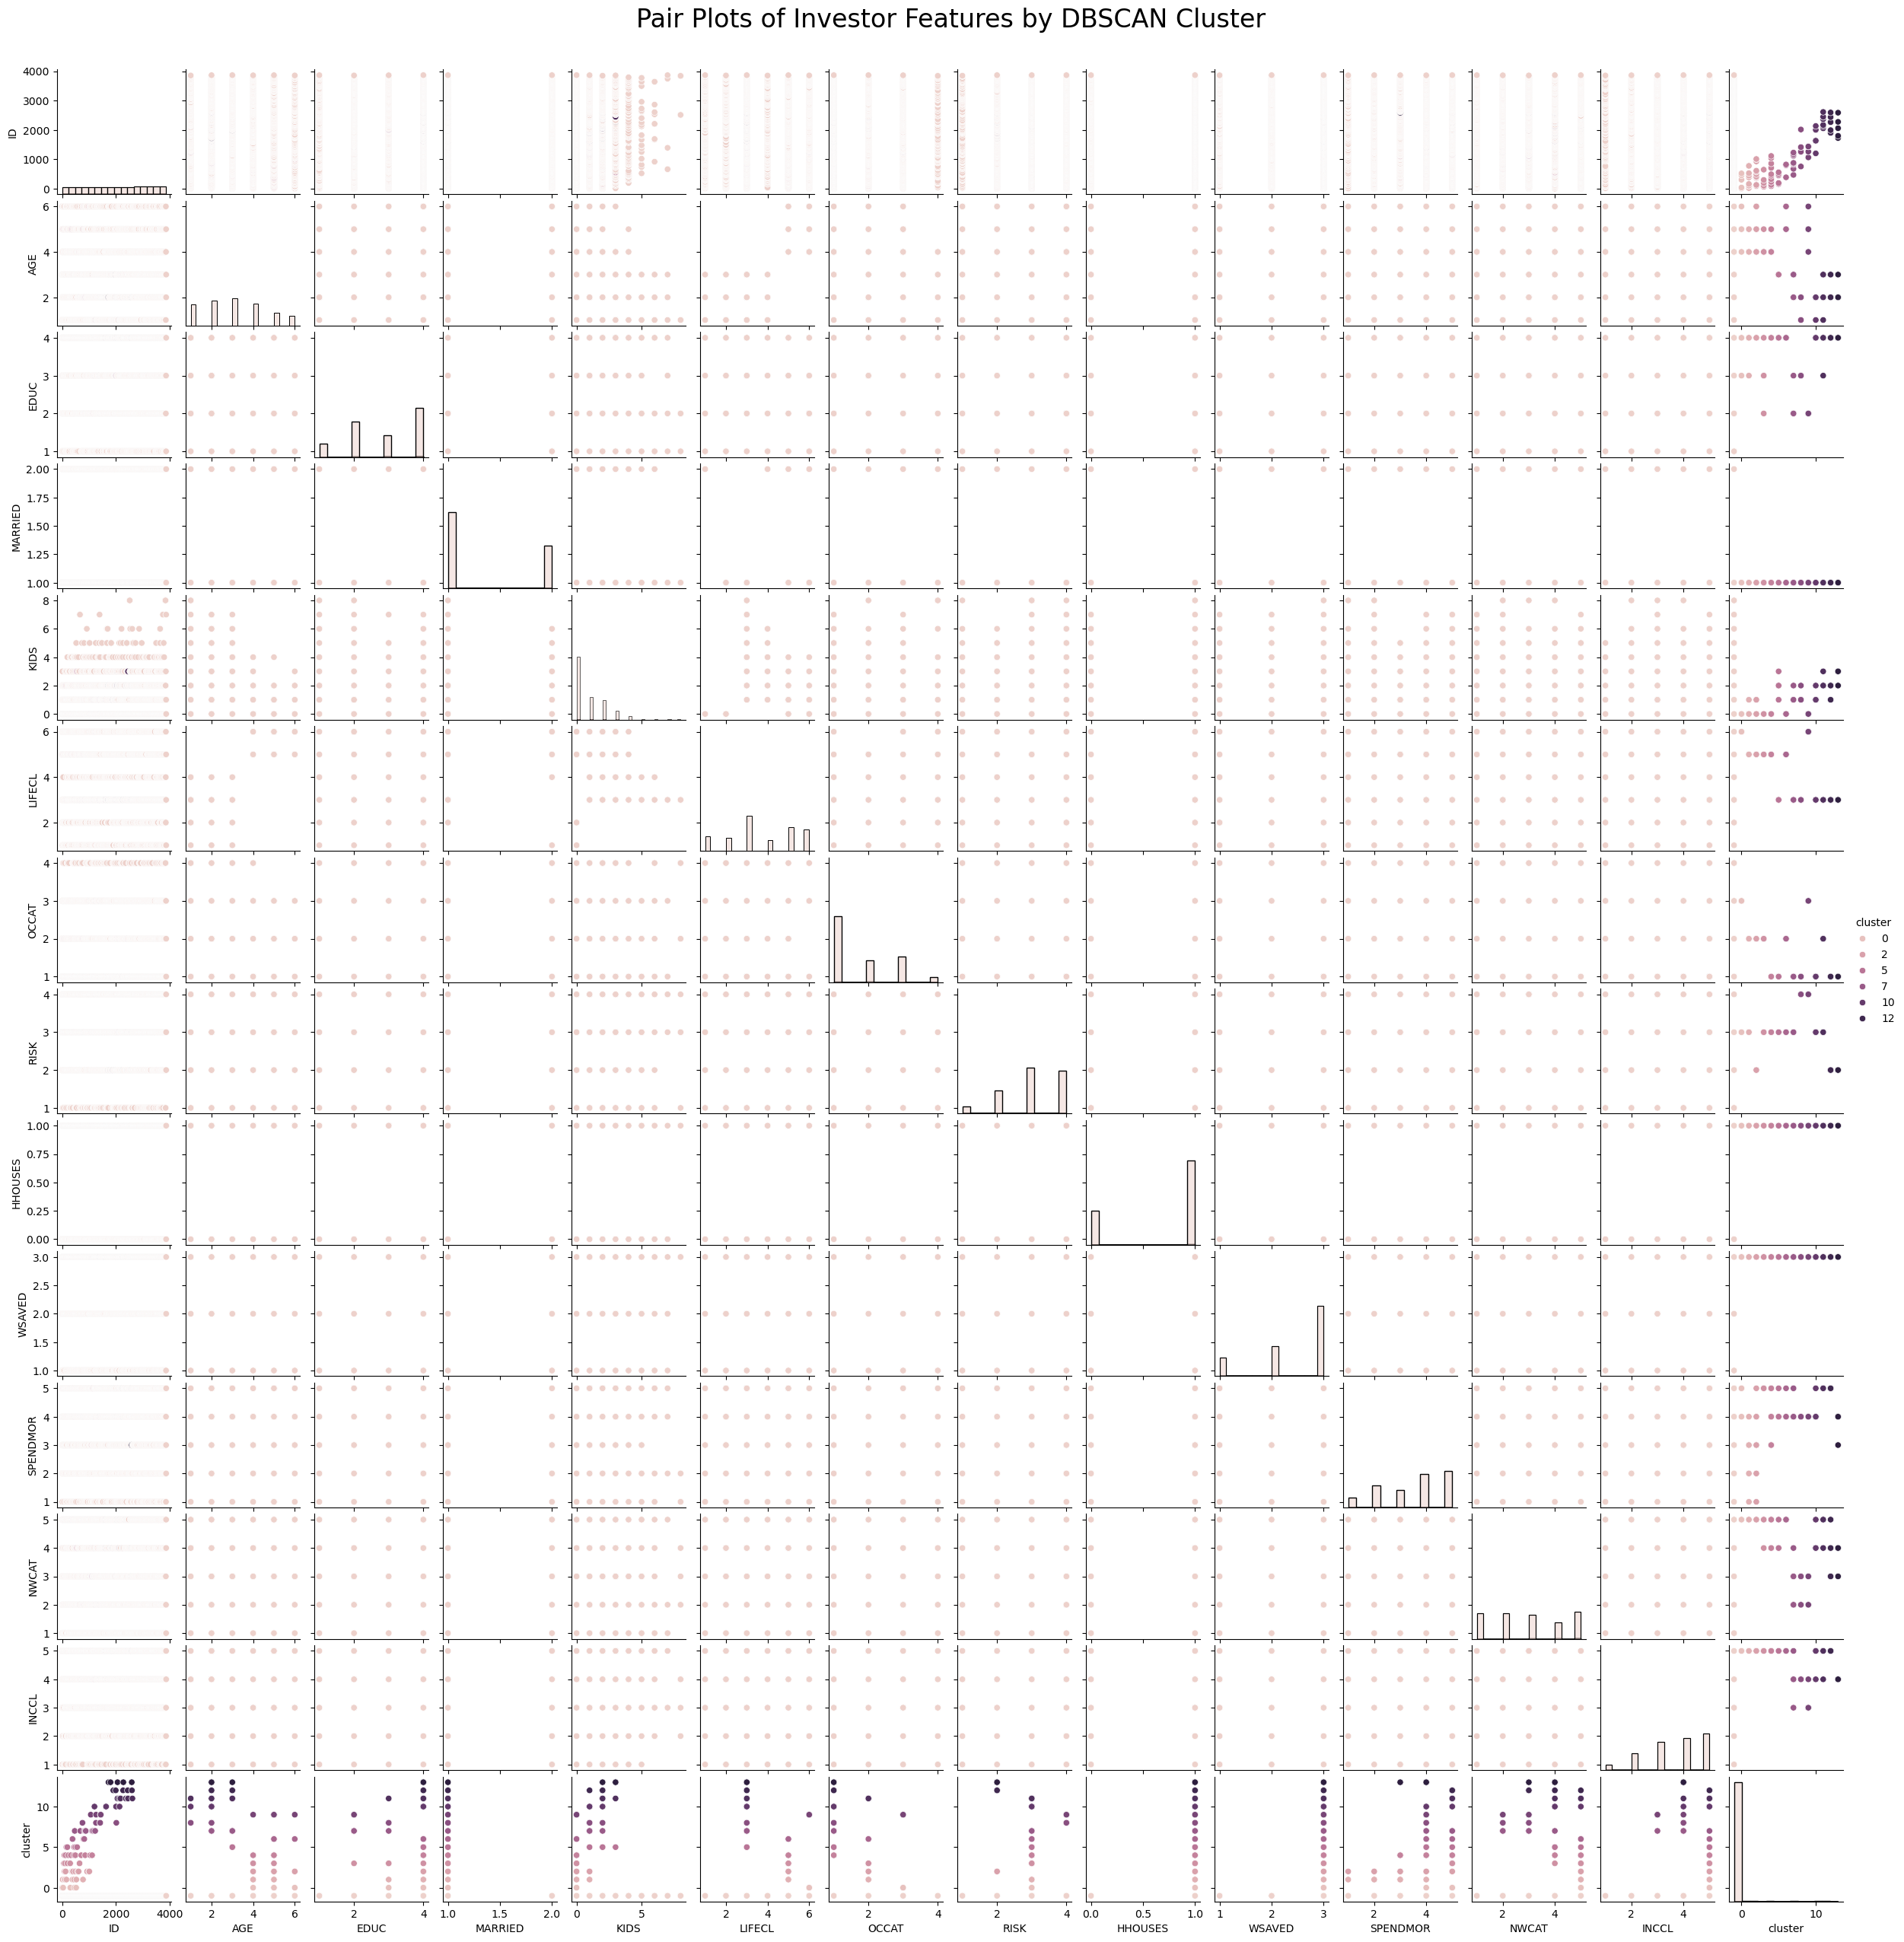

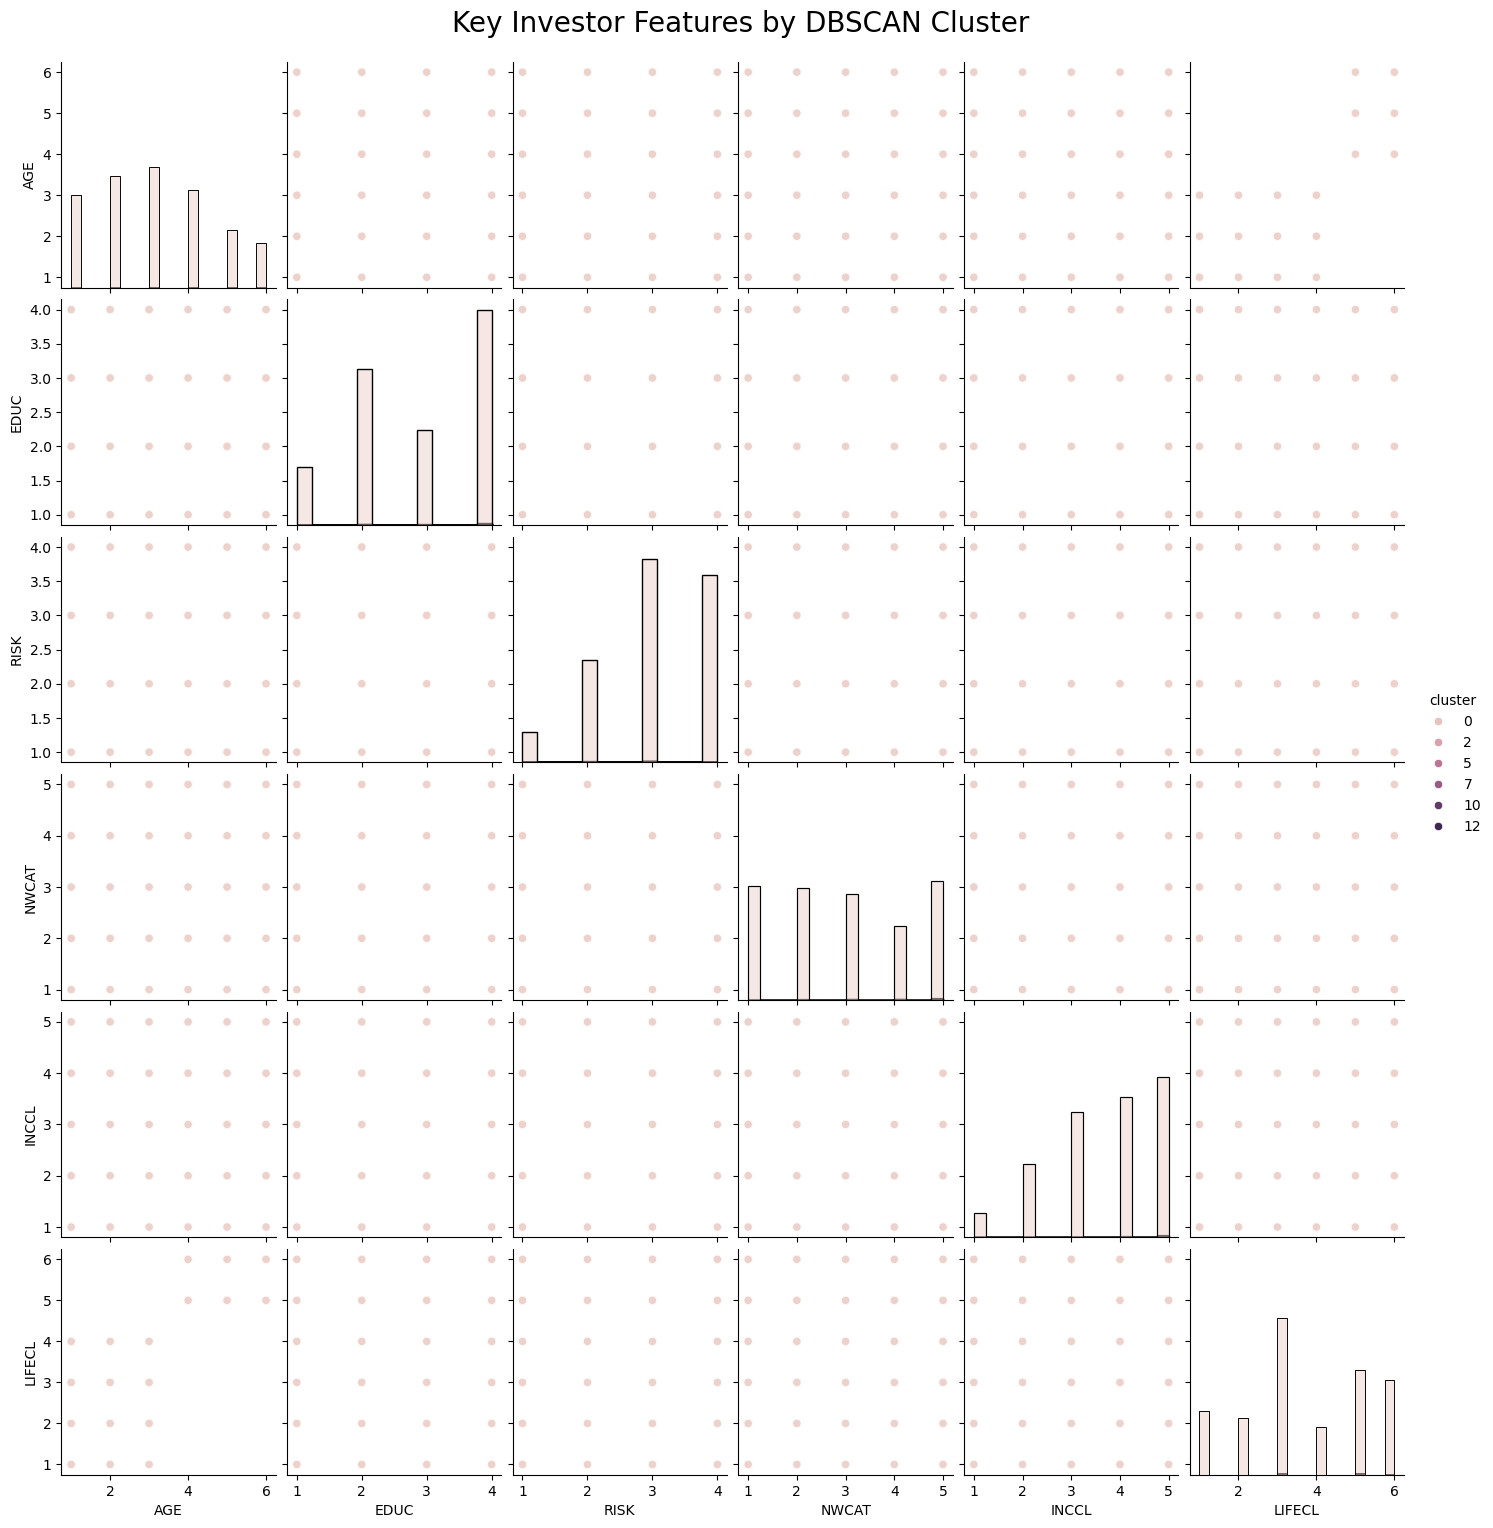


Cluster statistics (mean values):
                  ID       AGE      EDUC   MARRIED      KIDS    LIFECL  \
cluster                                                                  
-1       1956.021457  3.096689  2.890596  1.361854  0.940397  3.685033   
 0        266.400000  5.000000  3.800000  1.000000  0.000000  6.000000   
 1        314.500000  4.250000  3.875000  1.000000  0.125000  5.000000   
 2        498.538462  4.692308  4.000000  1.000000  0.230769  5.000000   
 3        263.400000  4.200000  3.000000  1.000000  0.000000  5.000000   
 4        543.600000  4.400000  4.000000  1.000000  0.000000  5.000000   
 5        372.600000  3.000000  4.000000  1.000000  2.000000  3.000000   
 6        669.666667  5.333333  4.000000  1.000000  0.000000  5.000000   
 7        929.777778  2.555556  2.111111  1.000000  1.111111  3.000000   
 8       1372.200000  1.600000  3.000000  1.000000  1.200000  3.000000   
 9       1326.800000  5.000000  2.000000  1.000000  0.000000  6.000000   
 10

In [11]:
# e. Based on your answer to part d, pick the better model, and use pair-plots to describe the features of each cluster

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from collections import Counter

# Load the data
df = pd.read_excel('HW10_InvestorData.xlsx')

# Standardize the data
scaler = StandardScaler()
x = scaler.fit_transform(df)

# Apply DBSCAN with the optimal parameters found in part (c)
# epsilon = 1.0, MinPts = 5
db = DBSCAN(eps=1.0, min_samples=5)
db.fit(x)

# Add cluster labels to the original dataframe
df['cluster'] = db.labels_

# Check cluster distribution
cluster_counts = Counter(db.labels_)
print("Number of investors in each DBSCAN cluster:")
for i, count in sorted(cluster_counts.items()):
    if i == -1:
        print(f"Noise points: {count} investors")
    else:
        print(f"Cluster {i}: {count} investors")

# Create pair plots 
grid = sns.pairplot(df, vars=df.columns, hue='cluster', diag_kind='hist')
grid.fig.set_size_inches(25,25)
plt.suptitle('Pair Plots of Investor Features by DBSCAN Cluster', fontsize=24, y=1.02)
plt.savefig('dbscan_pairplots.png')
plt.show()

# For better visualization of key features only, create a more focused pair plot
# Select the most important features for understanding investor profiles
important_features = ['AGE', 'EDUC', 'RISK', 'NWCAT', 'INCCL', 'LIFECL', 'cluster']
subset_grid = sns.pairplot(df, vars=important_features[:-1], hue='cluster', diag_kind='hist')
subset_grid.fig.set_size_inches(15,15)
plt.suptitle('Key Investor Features by DBSCAN Cluster', fontsize=20, y=1.02)
plt.savefig('dbscan_key_features.png')
plt.show()

# Calculate basic statistics for each cluster
cluster_stats = df.groupby('cluster').mean()
print("\nCluster statistics (mean values):")
print(cluster_stats)

# Create a summary table for the non-noise clusters
if -1 in cluster_stats.index:
    non_noise_stats = cluster_stats.drop(-1)
    print("\nNon-noise cluster statistics:")
    print(non_noise_stats)

### Based on the pair plots above, DBSCAN clustering identified 14 distinct clusters and a large proportion of noise points among the investor dataset. These clusters represent highly specialized investor segments with clear demographic and financial patterns. Older investors (age categories 4-6) predominantly appear in clusters 0, 1, 2, 3, 4, 6, and 9, and generally correspond to later lifecycle stages (LIFECL 5-6) with higher education levels. These older investor clusters typically show higher net worth (NWCAT 4-5) and maximum income levels (INCCL 5), particularly in clusters 0-6. Risk tolerance varies meaningfully across age groups, with clusters 8 and 9 displaying the highest risk appetite (RISK 4) despite their demographic differences, while clusters 2, 12, and 13 demonstrate more conservative approaches (RISK 2). Interestingly, all identified clusters share certain uniform characteristics – maximum home ownership (HHOUSES=1), maximum savings levels (WSAVED=3), and consistent marital status (MARRIED=1) – suggesting these variables were critical in establishing the density-connected regions that DBSCAN identified. Several unique profiles emerge, such as cluster 9 (older investors with unusually high risk tolerance but lower relative income) and cluster 5 (mid-lifecycle investors with higher children counts but substantial wealth). While these clusters represent mathematically well-defined market segments with high internal cohesion (reflected in the 0.329 silhouette score), their practical utility for portfolio management is limited by their extremely small size (5-13 investors each) and the fact that 97.65% of investors were classified as noise points, explaining why the broader K-means approach might offer more practical value despite its lower mathematical precision.